# 의사결정트리 (Decision Tree)
- 지니계수 : 최대값 0.5 얼마나 불순한지 (순수도) 확인.
- 루트노드 (맨 위) / 규칙으로 쪼갤 수 있는 규칙 노드 / 더이상 규칙으로 쪼갤 수 없는 리프노드

- 과적합 문제가 자주 발생할 수 있다.
-> 해결책으로 max_depth 등의 가지치기 등을 사용한다. OR 앙상블모델 사용한다.

In [1]:
from sklearn.tree import DecisionTreeClassifier              # 결정트리 분류 모델
from sklearn.datasets import load_iris                       # 붓꽃 데이터
from sklearn.model_selection import train_test_split   # 학습/테스트 데이터 분할

In [2]:
iris_data = load_iris()
X_train, X_test, y_train, y_test = train_test_split(
    iris_data.data,     # 입력 특성 X
    iris_data.target,   # 정답 라벨 y
    test_size=0.2,      # 테스트 데이터 비율 20%
    random_state=42     # 결과 재현(시드 고정)
)

print(len(X_train), len(X_test), len(y_train), len(y_test))
# 학습데이터와 테스트데이터 잘 분리됐는지 확인

120 30 120 30


In [3]:
model = DecisionTreeClassifier() # 결정트리 분류 모델
model.fit(X_train, y_train)      # 학습 데이터로 모델 학습

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the curre

In [4]:
# DecisionTree가 데이터를 어떻게 분기하는지 구조 시각화
from sklearn.tree import export_graphviz # 결정트리 구조를 파일로 출력

export_graphviz(
    model,                                      # 학습된 모델
    out_file = "./output/iris_tree.dot",               # 트리 구조 저장 경로 (파일)
    feature_names = iris_data.feature_names,    # 특성 이름
    class_names = iris_data.target_names,      # 클래스 이름
    filled = True                               # 노드색상으로 클래스 구분
)

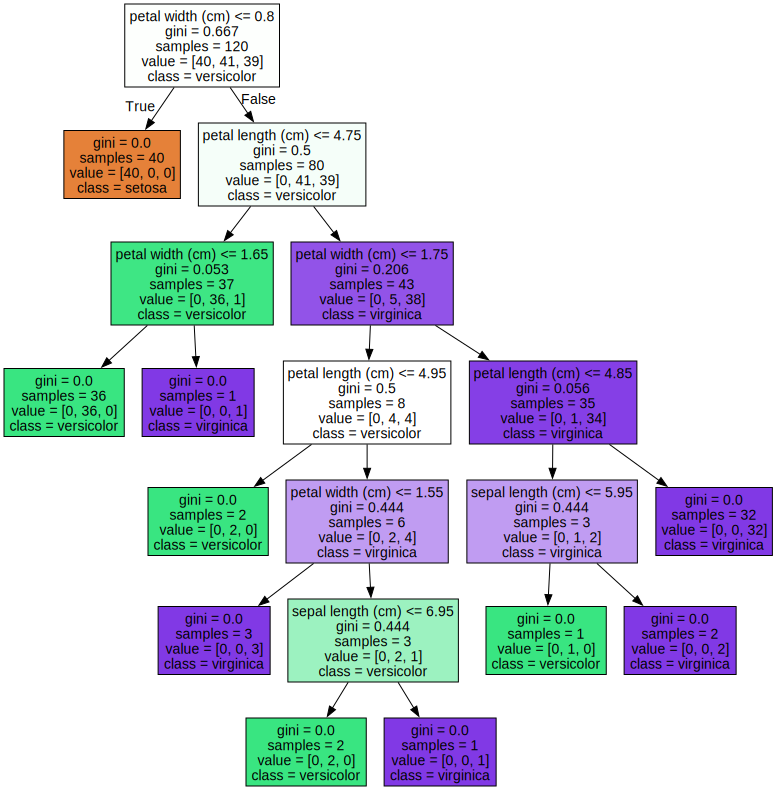

In [5]:
import graphviz  # Graph 시각화 라이브러리

with open('./output/iris_tree.dot') as f:
    dot_graph = f.read()

graphviz.Source(dot_graph)

### 앙상블 모델 : 머신러닝 집단지성
#### 보팅 : 여러개의 ML모델을 사용하는데 서로 다른 모델을 사용해서 사용(투표)한다.
- (LR, K-NN, SVM) 모델 혼합 사용
#### 배깅 : 같은 모델을 여러번 사용한다.
- (DT, DT, DT) 모델 사용해서 앙상블한다. -> Random Forest 모델
#### 부스팅(모델)

#### 방식
    - 하드보팅 : model1(0.3, 0.7), model2(0.4, 0.6), model3(0.7, 0.3) -> 분류모델일 경우
    결과가 첫번째 결과는 0.5 이하가 2개 이상이므로 (0), 두번째 결과는 0.5 이상이 2개 이상이므로 (1)로 판단한다.
        - 투표수로 투표한다.
    - 소프트보팅 : model1(0.3, 0.7), model2(0.4, 0.6), model3(0.7, 0.3) -> 분류모델일 경우
    결과가 (0.466.., 0.533..) => (0, 1)로 판단한다.

In [8]:
# 보팅방식 (여러 모델의 예측을 종합)
from sklearn.ensemble import VotingClassifier            # 투표 기반의 앙상블 분류기

from sklearn.linear_model import LogisticRegression     # 로지스틱회귀 모델
from sklearn.neighbors import KNeighborsClassifier       # KNN 분류모델

from sklearn.datasets import load_breast_cancer          # 유방암 데이터셋 로드
from sklearn.model_selection import train_test_split     # 학습/테스트 데이터셋 분리

from sklearn.metrics import accuracy_score               # 분류 정확도 평가
import pandas as pd

In [12]:
cancer = load_breast_cancer()

cancer_df = pd.DataFrame(
    cancer.data,                      # 입력 특성 데이터
    columns = cancer.feature_names,   # 입력 특성 이름
)
cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [13]:
# EDA는 생략, 데이터 분류부터 진행
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data,     # 입력 특성 X
    cancer.target,   # 정답 라벨 y
    test_size=0.2,   # 테스트데이터 비율 20%
    random_state=42  # 결과 재현용 시드
)

In [ ]:
lr_model = LogisticRegression(solver='liblinear') # 로지스틱 회귀 ( 기본방법)
knn_model = KNeighborsClassifier(n_neighbors=8)   # KNN 모델 (이웃수 8)

In [16]:
vo_model = VotingClassifier(
    estimators = [            # 사용할 개별 모델들
        ('lr', lr_model),
        ('knn', knn_model)
    ],
    voting = 'soft'            # 확률기반 보팅방식
)

vo_model.fit(X_train, y_train) # 보팅모델 학습


,"estimators estimators: list of (str, estimator) tuplesInvoking the ``fit`` method on the ``VotingClassifier`` will fit clonesof those original estimators that will be stored in the class attribute``self.estimators_``. An estimator can be set to ``'drop'`` using:meth:`set_params`... versionchanged:: 0.21 ``'drop'`` is accepted. Using None was deprecated in 0.22 and support was removed in 0.24.","[('lr', ...), ('knn', ...)]"
,"voting voting: {'hard', 'soft'}, default='hard'If 'hard', uses predicted class labels for majority rule voting.Else if 'soft', predicts the class label based on the argmax ofthe sums of the predicted probabilities, which is recommended foran ensemble of well-calibrated classifiers.",'soft'
,"weights weights: array-like of shape (n_classifiers,), default=NoneSequence of weights (`float` or `int`) to weight the occurrences ofpredicted class labels (`hard` voting) or class probabilitiesbefore averaging (`soft` voting). Uses uniform weights if `None`.",None
,"n_jobs n_jobs: int, default=NoneThe number of jobs to run in parallel for ``fit``.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionadded:: 0.18",None
,"flatten_transform flatten_transform: bool, default=TrueAffects shape of transform output only when voting='soft'If voting='soft' and flatten_transform=True, transform method returnsmatrix with shape (n_samples, n_classifiers * n_classes). Ifflatten_transform=False, it returns(n_classifiers, n_samples, n_classes).",True
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting will be printed as itis completed... versionadded:: 0.23",False
,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001


In [17]:
pred = vo_model.predict(X_test)   # 테스트 데이터 예측
pred

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 0, 0])

In [19]:
accuracy_score(y_test, pred)   # 예측 정확도 계산
# y_test -> 실제 정답값, pred -> 모델의 예측값

0.9649122807017544

In [ ]:
# 모델 1 단독 사용
lr_model.fit(X_train, y_train)     # 로지스틱 회귀 모델 학습
lr_pred = lr_model.predict(X_test) # 테스트 데이터로 예측

accuracy_score(y_test, lr_pred)    # 예측 정확도 계산 

0.956140350877193

In [23]:
# 모델 2 단독 사용
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)

accuracy_score(y_test, knn_pred)

0.956140350877193

In [24]:
# 배깅 방식 ( 랜덤포레스트 사용 )
from sklearn.ensemble import RandomForestClassifier   # 결정 트리 기반 앙상블 모델
from sklearn.metrics import accuracy_score            # 성능평가지표(정확도)
from sklearn.model_selection import train_test_split  # 데이터셋 분할
import pandas as pd
import numpy as np

In [25]:
cancer = load_breast_cancer()

In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data,    # 입력 특성 X
    cancer.target,  # 정답 라벨 y
    test_size=0.2,  # 테스트 데이터 비율 20%
    random_state=42 # 결과 재현용 시드 42
)

In [28]:
# RandomForest 모델 불러온다 (시드 42, 트리 최대깊이 5)
rf_model = RandomForestClassifier(random_state=42, max_depth=5)

# 랜덤 포레스트 모델 학습
rf_model.fit(X_train, y_train)

,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",5
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric(y_

In [29]:
# 테스트 데이터로 예측
y_pred = rf_model.predict(X_test)

# 예측 정확도 계산
accuracy_score(y_test, y_pred)

0.9649122807017544

In [30]:
# GridSearchCV로 하이퍼파라미터 튜닝
from sklearn.model_selection import GridSearchCV   # 파이퍼파라미터 최적화 도구

params = {
    "max_depth": [2, 3, 4],                # 트리 최대 깊이 후보
    "min_samples_split": [2, 4, 6, 8, 10], # 분기 최소 샘플 수 후보
    "min_samples_leaf": [2, 8, 16]         # 리프 최소 샘플 수 후보
}

rf_model = RandomForestClassifier(
    n_estimators = 100,   # 트리 개수
    random_state = 42     # 난수 시드
)

grid_search = GridSearchCV(
    estimator = rf_model,   # 최적화 대상 모델
    param_grid = params,    # 파이퍼파라미터 후보
    cv = 5,                 # 교차 검증 횟수
)

grid_search.fit(X_train, y_train)  # 최적 파라미터 탐색

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",RandomForestC...ndom_state=42)
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'max_depth': [2, 3, ...], 'min_samples_leaf': [2, 8, ...], 'min_samples_split': [2, 4, ...]}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",None
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is displayed;- >2

In [ ]:
grid_search.best_params_ # 최적의 하이퍼파라미터 조합 확인

{'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2}

In [ ]:
grid_search.best_score_  # 교차 검증 기준 최고 성능 점수 확인

np.float64(0.9516483516483516)

In [36]:
import time

rf_model = RandomForestClassifier(
    max_depth = 4,          # 트리 최대 깊이
    min_samples_leaf = 2,   # 리프 최소 샘플 수 
    min_samples_split = 2,  # 분기 최소 샘플 수
    n_estimators = 100,     # 트리 개수
    random_state = 42       # 결과 재현용 시드 42
)

start_time = time.time()
rf_model.fit(X_train, y_train)
end_time = time.time()
print("소요시간 :", end_time - start_time, "초")  # 학습 소요시간 출력
pred = rf_model.predict(X_test)
accuracy_score(y_test, pred)

소요시간 : 0.08907794952392578 초


0.9649122807017544

#### 부스팅 방식 : 첫번째 모델이 잘못 계산한 것을 두번째 모델이 개선시켜 학습시키고, 두번쨰 모델이 잘못 계산한 것을 세번째 모델이 개선시켜 학습시킨다.
- 속도가 다른 앙상블 모델에 비해 상대적으로 느리다.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier  # 그래디언트 부스팅 분류 모델

X_train, X_test, y_train, y_test = train_test_split(
    cancer.data,
    cancer.target,
    test_size = 0.2,
    random_state = 42
)

gb_model = GradientBoostingClassifier(random_state = 42)  # GB 모델 생성

start_time = time.time()
gb_model.fit(X_train, y_train)
end_time = time.time()

print("소요시간 :", end_time - start_time, "초")
pred = gb_model.predict(X_test)

accuracy_score(y_test, pred)

소요시간 : 0.2769510746002197 초


0.956140350877193